In [1]:
import ast

import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import os
import pandas as pd

In [2]:
faces_info = pd.read_csv('face_info_inner_outer_moments.csv')
faces_info.head(20)

,Unnamed: 0,index,path,name,average moments,outer moments,descriptors
0,0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Paul_McNulty,0.112463,0.725760,"[[-0.07060801982879639, 0.055325791239738464, ..."
1,1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Claudia_Pechstein,0.420017,0.871986,"[[-0.12504813075065613, 0.05177184194326401, 0..."
2,2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Ranil_Wickremasinghe,0.295237,0.748162,"[[-0.17116184532642365, 0.11164872348308563, 0..."
3,3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Mary-Kate_Olsen,0.239285,0.895004,"[[-0.10580670088529587, 0.11046406626701355, 0..."
4,4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Phil_Mickelson,0.174751,0.783404,"[[-0.1046021431684494, 0.06169402599334717, 0...."
5,5,5,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Salma_Hayek,0.416960,0.859399,"[[-0.1545976847410202, 0.09313353896141052, 0...."
6,6,6,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jim_Edmonds,0.184477,0.839535,"[[-0.07895531505346298, 0.06912986934185028, 0..."
7,7,7,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Martina_McBride,0.347304,0.920787,"[[-0.14180077612400055, 0.03891026973724365, 0..."
8,8,8,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jose_Theodore,0.141682,0.859520,"[[-0.11990146338939667, 0.14439266920089722, 0..."
9,9,9,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Heidi_Fleiss,0.326087,0.905066,"[[-0.054686881601810455, 0.11288697272539139, ..."


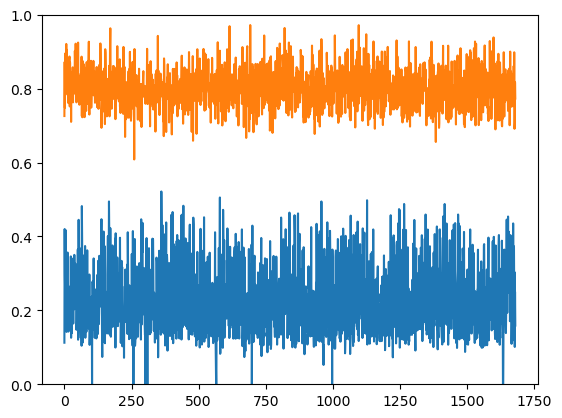

In [3]:
plt.plot(faces_info['average moments'])
plt.plot(faces_info['outer moments'])
plt.ylim(0, 1)
plt.show()

In [4]:
inner_mean = faces_info['average moments'].mean()
outer_mean = faces_info['outer moments'].mean()
[inner_mean, outer_mean]

[0.22609348843490554, 0.8017531843024237]

In [5]:
faces_info['average moments'].describe()

count    1680.000000
mean        0.226093
std         0.096198
min         0.000000
25%         0.148209
50%         0.203380
75%         0.293872
max         0.521613
Name: average moments, dtype: float64

In [6]:
faces_info['outer moments'].describe()

count    1680.000000
mean        0.801753
std         0.051752
min         0.608283
25%         0.766762
50%         0.799236
75%         0.836157
max         0.971920
Name: outer moments, dtype: float64

In [7]:
# calc proportion
iner_mmt = faces_info['average moments']
otr_mmt = faces_info['outer moments']
def calc_proportion(inn, outt):
    t_mean = (inn + outt) / 2
    return t_mean / inn if inn != 0 else 0

result = pd.Series([calc_proportion(inn, outt) for inn, outt in zip(iner_mmt, otr_mmt)])

In [8]:
result.head(5)

0    3.726650
1    1.538036
2    1.767055
3    2.370162
4    2.741490
dtype: float64

In [9]:
result.mean()

2.5764417969235707

In [10]:
result.describe()

count    1680.000000
mean        2.576442
std         0.901412
min         0.000000
25%         1.853195
50%         2.440683
75%         3.172739
max         8.423425
dtype: float64

In [11]:
# 查看plt
lmd = lambda inn, res: inn * res
inner_gamma = pd.Series([lmd(inn, res) for inn, res in zip(iner_mmt, result)])
inner_gamma

0       0.419112
1       0.646001
2       0.521700
3       0.567145
4       0.479077
          ...   
1675    0.568677
1676    0.497387
1677    0.404170
1678    0.533598
1679    0.465941
Length: 1680, dtype: float64

In [36]:
test_faces = '/Users/outianyi/PythonProject/Test_Dlib/Test_faces'
test_people = os.listdir(test_faces)
test_people

['Bionce',
 'Owl_City',
 'Eminem',
 'ZhaoLiYing',
 'WangBaoQiang',
 'ZhaoJinMai',
 'Elizabeth_Olsen',
 'Koby_Bryant',
 'Robert_John_Downey',
 'LinJunJie']

In [37]:
test_paths = [os.path.join(test_faces, test_person) for test_person in test_people]

In [38]:
df_path = pd.DataFrame(test_paths, columns=['path'])
df_path

,path
0,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
1,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
2,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
3,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
4,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
5,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
6,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
7,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
8,/Users/outianyi/PythonProject/Test_Dlib/Test_f...
9,/Users/outianyi/PythonProject/Test_Dlib/Test_f...


In [39]:
# df_path.to_csv('test_people_path.csv')

In [31]:
# 全部转换为jpg
for path in df_path['path']:
    # print(path)
    if path.endswith('.DS_Store'):
        os.remove(path)
        continue
    faces = os.listdir(path)
    for face in faces:
        if face == '.DS_Store':
            os.remove(os.path.join(path, face))
            continue
        if not face.endswith('.jpg'):
            # 转换当前格式图片为 .jpg
            img = cv2.imread(os.path.join(path, face))
            cv2.imwrite(os.path.join(path, face[:-4] + '.jpg'), img)
            # 删除当前格式图片
            os.remove(os.path.join(path, face))


In [33]:
face1 = os.path.join(test_faces, 'Bionce')
face1

'/Users/outianyi/PythonProject/Test_Dlib/Test_faces/Bionce'

In [35]:
os.listdir(test_faces)

['Bionce',
 'Owl_City',
 'Eminem',
 'ZhaoLiYing',
 'WangBaoQiang',
 'ZhaoJinMai',
 'Elizabeth_Olsen',
 'Koby_Bryant',
 'Robert_John_Downey',
 'LinJunJie']

# 检查计算好 inner 和 outer 的验证人脸组

In [42]:
test_path = '/Users/outianyi/PythonProject/Test_Dlib/test_faces_inner_outer_moments.csv'
test_faces = pd.read_csv(test_path)
test_faces

,Unnamed: 0,index,path,name,average moments,outer moments,descriptors
0,0,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,Bionce,0.304754,0.878076,"[[[-0.10347402840852737, -0.001810923218727111..."
1,1,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,Owl_City,0.304504,0.835662,"[[[-0.0625755712389946, 0.12872013449668884, 0..."
2,2,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,Eminem,0.300695,0.824447,"[[[-0.08129367232322693, 0.138262540102005, 0...."
3,3,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,ZhaoLiYing,0.287501,0.853415,"[[[-0.057610392570495605, 0.06464560329914093,..."
4,4,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,WangBaoQiang,0.293062,0.799216,"[[[-0.0962141826748848, 0.06846193969249725, 0..."
5,5,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,ZhaoJinMai,0.275868,0.689842,"[[[-0.02582915872335434, 0.01445750892162323, ..."
6,6,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,Elizabeth_Olsen,0.328244,0.845608,"[[[-0.11219753324985504, 0.06213999167084694, ..."
7,7,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,Koby_Bryant,0.268623,0.765795,"[[[-0.0390811488032341, 0.11039527505636215, 0..."
8,8,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,Robert_John_Downey,0.320280,0.842239,"[[[-0.10775646567344666, 0.061732105910778046,..."
9,9,NaN,/Users/outianyi/PythonProject/Test_Dlib/Test_f...,LinJunJie,0.213454,0.818295,"[[[0.0017786398530006409, 0.12405867874622345,..."


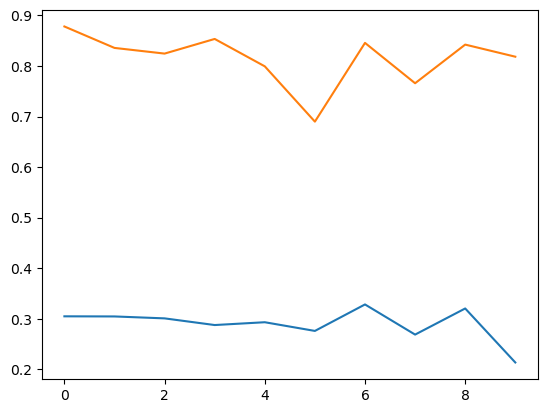

In [97]:
plt.plot(test_faces['average moments'])
plt.plot(test_faces['outer moments'])
plt.show()

## 验证一个人的

In [58]:
import ast
one_face = ast.literal_eval(test_faces['descriptors'][0])
len(one_face[0][0])

128

In [70]:
def distance(a, b):
    return np.sqrt(np.sum(np.square(np.array(a) - np.array(b))))

0
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']
1
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']
2
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']
3
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']
4
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']
5
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']
6
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']
7
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']
8
['01', '02', '03', '04', '12', '13', '14', '23', '24', '34']


IndexError: list index out of range

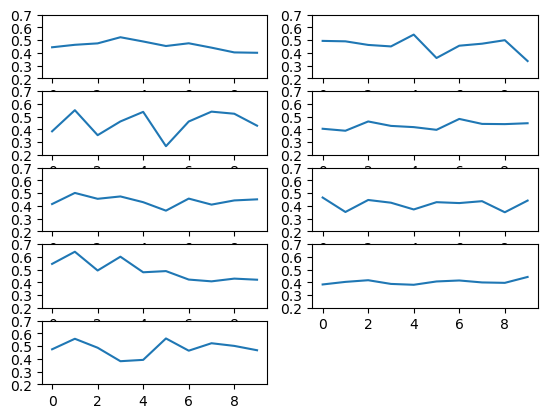

In [102]:
for i in range(len(test_faces['descriptors'])):
    t_des = ast.literal_eval(test_faces['descriptors'][i])
    t_moments = []
    comb = []
    for j in range(5):
        for k in range(j+1, 5):
            # print('ss')
            # print(len(t_des[i][0]))
            t_moments.append(distance(t_des[j][0], t_des[k][0]))
            comb.append(str(j)+str(k))
    print(i)
    print(comb)
    plt.subplot(5, 2, i+1), plt.plot(t_moments), plt.ylim(0.2, 0.7), plt.yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

In [84]:
len(test_faces['descriptors'])

10